In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segmentacion.globalT import thresholdingGlobal
from formas_binarias import etiquetas_c
from Clasificadores import KmeansComplete
from Clasificadores import elbow_method
import os

In [2]:
imagen = cv2.imread('imagenesPruebas/Kmeans.png')
img = np.array(imagen)

In [3]:
print(img.shape)
imgRecortada = img[:580,:,:]

(963, 693, 3)


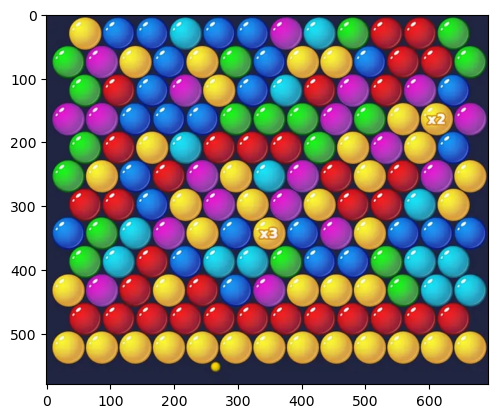

In [4]:
plt.imshow(cv2.cvtColor(imgRecortada, cv2.COLOR_BGR2RGB))

In [5]:
def rgb2grayInverse(rgb):
    return np.dot(rgb[..., :3], [0.114, 0.587, 0.299]).astype(np.uint8)

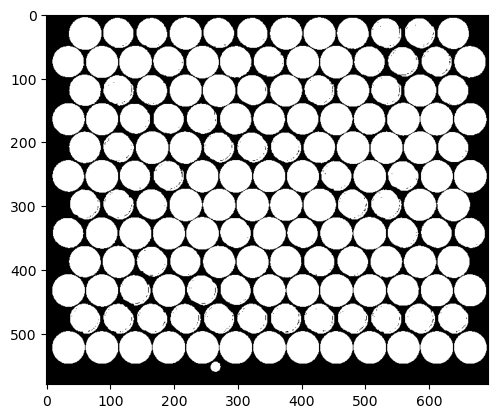

In [6]:
from segmentacion.bernsen import Bernsen
img = np.array(imgRecortada)
imggrayI= rgb2grayInverse(img)
globalX = thresholdingGlobal(imggrayI, 26)
globalXI = globalX
plt.imshow(globalXI, cmap ='gray')

[(151, 108, 84), (135, 192, 8), (227, 9, 131), (6, 24, 21), (36, 141, 253), (229, 144, 179), (160, 207, 136), (105, 116, 138), (6, 231, 91), (245, 8, 223), (9, 232, 126), (14, 184, 74), (36, 85, 217), (79, 30, 135), (210, 13, 77), (121, 251, 248), (162, 69, 61), (210, 224, 82), (80, 110, 17), (244, 141, 198), (25, 132, 149), (187, 251, 31), (204, 200, 151), (245, 25, 187), (212, 19, 65), (13, 213, 62), (95, 22, 122), (248, 205, 82), (123, 218, 146), (63, 173, 138), (86, 53, 253), (71, 185, 208), (8, 198, 5), (200, 79, 65), (220, 220, 190), (197, 4, 187), (175, 188, 246), (26, 58, 73), (164, 192, 82), (125, 6, 115), (227, 203, 140), (43, 99, 129), (224, 80, 158), (49, 114, 189), (88, 179, 240), (65, 242, 199), (237, 93, 9), (6, 245, 211), (191, 19, 219), (52, 116, 159), (88, 30, 177), (245, 250, 38), (107, 109, 67), (64, 94, 59), (20, 230, 25), (187, 15, 0), (47, 83, 179), (211, 36, 238), (90, 244, 202), (173, 163, 38), (86, 138, 2), (190, 34, 23), (42, 133, 7), (23, 59, 158), (212, 220

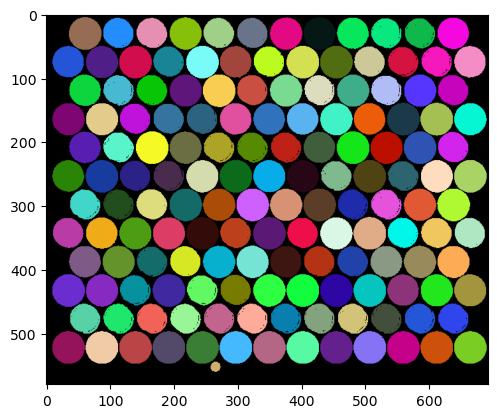

In [7]:
colors, numcolors = etiquetas_c(globalXI)
colors = np.array(colors)
plt.imshow(colors)
print(numcolors)
print(len(numcolors))

In [8]:
prom = np.zeros((len(numcolors), 3))
colors = np.array(colors)

for num in range(len(numcolors)):
    mask = np.all(colors == numcolors[num], axis=2)
    count = np.sum(mask)
    if count > 0:
        imgRecortada_masked = imgRecortada * mask[:, :, np.newaxis]
        prom[num, :3] = np.sum(imgRecortada_masked, axis=(0, 1)) / count

print(prom)
print(prom.shape)   

[[ 65.03152279 188.44810863 221.37196896]
 [200.50226017 175.07835259  37.78252135]
 [181.55405405  52.5980981  174.3988989 ]
 [200.02205514 174.83659148  37.71478697]
 [208.05791284 108.82798165  37.40481651]
 [208.16552119 108.96334479  37.63860252]
 [208.40470723 109.10447761  37.61825488]
 [208.12107367 108.93318104  37.81324957]
 [ 57.74894958 185.8644958   54.56932773]
 [ 57.66351706 185.34435696  54.68346457]
 [ 49.30486358  38.19928826 191.66192171]
 [ 49.18842292  38.57590077 190.96042528]
 [ 57.59241706 186.07214323  54.5150079 ]
 [182.23366834  52.70703518 175.34824121]
 [ 65.46407767 187.97669903 221.62427184]
 [ 65.45379377 188.61381323 222.13570039]
 [ 57.48165618 185.74475891  54.3663522 ]
 [ 65.3685742  188.13094083 221.27303589]
 [ 65.02719767 188.42399223 221.69208354]
 [ 57.58372703 185.78425197  54.52650919]
 [207.99139908 109.14908257  37.39105505]
 [208.30264672 109.21864212  37.35212888]
 [208.46127367 109.04417671  37.59781985]
 [ 49.31761194  38.57492537 191.66

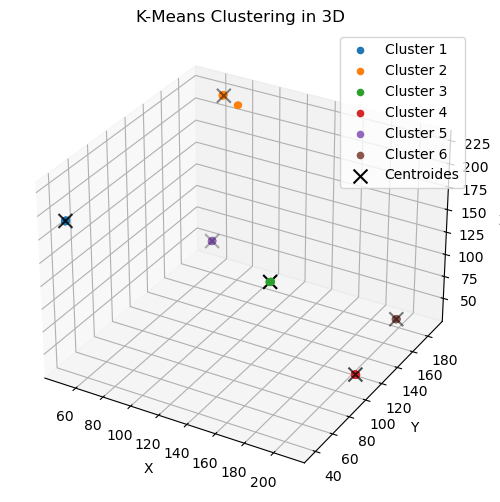

Centroide 1: [49.22488174755278, 38.50667972190768, 191.65857671267335]
Puntos en el cluster 1: [[49.30486358244365, 38.19928825622776, 191.66192170818505], [49.18842291789722, 38.575900767867694, 190.96042528056705], [49.317611940298505, 38.57492537313433, 191.66268656716417], [49.65120481927711, 38.757831325301204, 192.36204819277108], [49.33136094674556, 38.407100591715974, 191.76508875739646], [49.048549437537005, 38.48549437537004, 191.59088217880404], [48.94630071599045, 38.67541766109785, 191.90751789976133], [49.528749259039714, 38.59988144635447, 191.4635447540012], [49.062836624775585, 38.38180730101735, 191.9084380610413], [49.20154119739182, 38.333135743924124, 191.5465323058684], [49.44854253420583, 38.70196311719215, 191.58298631766806], [49.216924910607865, 38.55899880810489, 192.015494636472], [49.24033313503867, 38.405116002379536, 191.79476502082093], [49.28909952606635, 38.61492890995261, 191.49052132701422], [49.081242532855434, 38.57347670250896, 191.95221027479093

In [12]:
newProm = KmeansComplete(prom, 6)

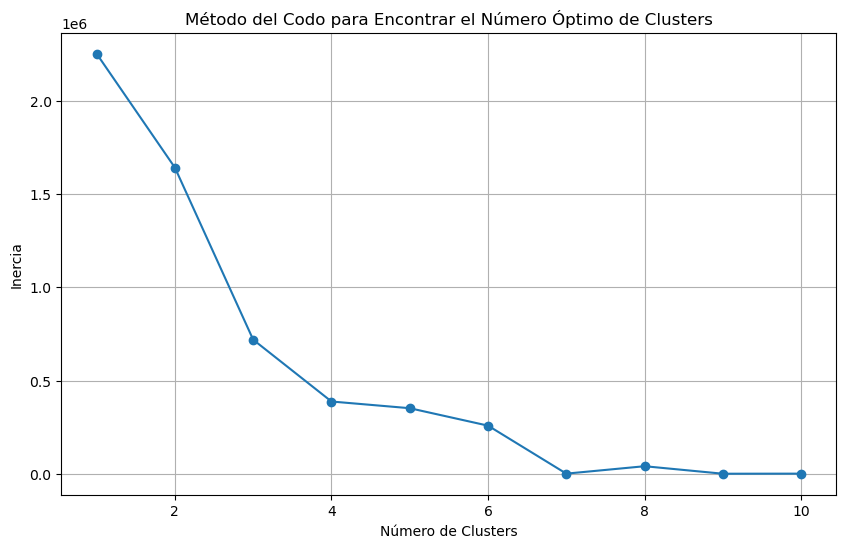

In [10]:
elbow_method(prom.tolist(), 10) 